# 실험 데이터셋 생성

In [1]:
from src.skeleton import BaseModel

In [2]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
from src.utils.data_utils import RotorDataset

train_dataset = RotorDataset('train', p=0.0015, snr=None, seed=5)
test_dataset = RotorDataset('test', p=1, snr=None, seed=5)

train dataset size:14680, labeled:22, unlabeled:14658
labels : [0:3, 1:5, 2:4, 3:6, 4:4]
test dataset size:3400, labeled:3400, unlabeled:0
labels : [0:680, 1:680, 2:680, 3:680, 4:680]


# 1. 모델 학습

In [4]:
## TODO : Define necessary functions

### !!! **실험 모델 정의**

In [5]:
## TODO : HERE
class YourModel(BaseModel):
    def __init__(self, model_name='your_model'):
        return super().__init__(model_name=model_name)
    
    def preprocess(self, batch=None, label=None, mask=None):
        return super().preprocess(batch=batch, label=label, mask=mask)
    
    def forward(self, batch, label=None, mask=None):
        return super().forward(batch=batch, label=label, mask=mask)
        
    def criterion(self, pred=None, batch=None, label=None, mask=None):
        return super().criterion(pred=pred, batch=batch, label=label, mask=mask)
        
    def compute_score(self, pred=None, batch=None, label=None, mask=None):
        return super().compute_score(pred=pred, batch=batch, label=label, mask=mask)
    
    def get_z(self, batch, label=None, mask=None):
        out = self.forward(batch=batch, label=label, mask=mask)
        return out, out

### !!! 하이퍼파라미터 변경 (optional)

In [6]:
## TODO : HERE
BATCH = 256
EPOCH = 50
LR = 1e-3

train, test DataLoader 생성

In [7]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=BATCH)
test_loader = DataLoader(test_dataset, batch_size=BATCH)

### !!! 필요에 따라 모델 input argument 업데이트

In [8]:
## TODO : HERE
model = YourModel(model_name='your_model1')
model.cuda()

YourModel(
  (conv1): Sequential(
    (0): Conv1d(12, 16, kernel_size=(64,), stride=(16,), padding=(24,), bias=False)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (conv2): Sequential(
    (0): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (conv3): Sequential(
    (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (conv4): Sequential(
    (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bia

optimizer 생성
- !!! 필요에 따라 Weight Decay 설정

In [9]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), LR)

```train_model()``` method를 통해 모델 학습
- !!! 필요에 따라 report_intv 변경

In [10]:
model.train_model(train_loader, test_loader, EPOCH, optimizer, report_intv=1)

(1.95s) [Epoch 1]
	Train Loss : 0.72306	Train Score : 0
	Eval Loss : 1.4269	Eval Score : 0
(1.65s) [Epoch 2]
	Train Loss : 0.56956	Train Score : 0
	Eval Loss : 1.5663	Eval Score : 0
(1.65s) [Epoch 3]
	Train Loss : 0.49409	Train Score : 0
	Eval Loss : 1.8092	Eval Score : 0
(1.66s) [Epoch 4]
	Train Loss : 0.44275	Train Score : 0
	Eval Loss : 1.9584	Eval Score : 0
(1.66s) [Epoch 5]
	Train Loss : 0.39516	Train Score : 0
	Eval Loss : 2.2782	Eval Score : 0
(1.66s) [Epoch 6]
	Train Loss : 0.36074	Train Score : 0
	Eval Loss : 2.2635	Eval Score : 0
(1.67s) [Epoch 7]
	Train Loss : 0.32929	Train Score : 0
	Eval Loss : 2.8925	Eval Score : 0
(1.67s) [Epoch 8]
	Train Loss : 0.30577	Train Score : 0
	Eval Loss : 3.0485	Eval Score : 0
(1.66s) [Epoch 9]
	Train Loss : 0.28299	Train Score : 0
	Eval Loss : 3.2468	Eval Score : 0
(1.67s) [Epoch 10]
	Train Loss : 0.25621	Train Score : 0
	Eval Loss : 3.6495	Eval Score : 0
(1.67s) [Epoch 11]
	Train Loss : 0.23305	Train Score : 0
	Eval Loss : 3.8466	Eval Score :

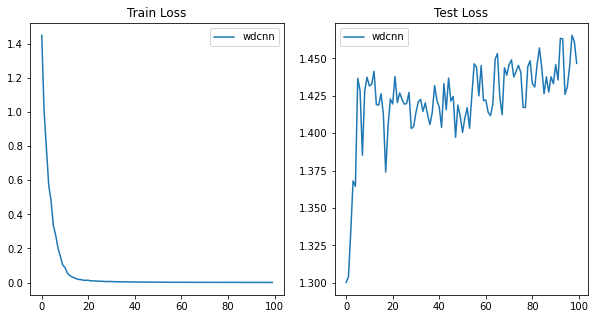

In [11]:
from src.utils.exp_utils import *
MODEL_NAMES = ['your_model1']
plot_logs(MODEL_NAMES)

# 2-1. 결과 분석 (Deep Classification Models)
- Deep Kernel 모델의 경우, ***2-2***에서 분석

### tSNE를 통한 latent distribution visualization (Test 데이터)
- !!! **PLOT_EPOCH** 변경을 통해 분석할 모델 epoch 결정

Start Reducing Z Dimension for Visualization


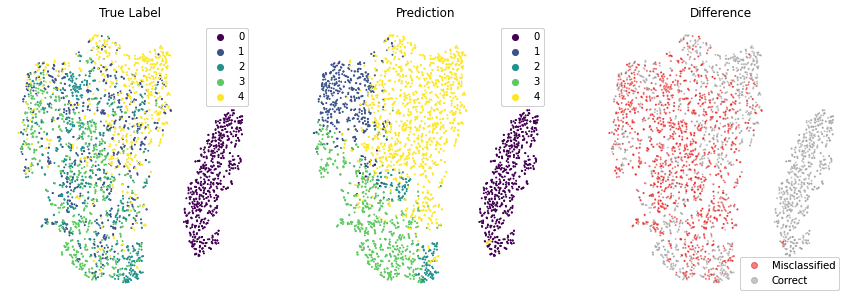

In [15]:
PLOT_EPOCH = 50

plot_latent(model, PLOT_EPOCH, test_loader, method='tsne')

### tSNE를 통한 latent distribution visualization (Train 데이터)
- !!! **PLOT_EPOCH** 변경을 통해 분석할 모델 epoch 결정

Start Reducing Z Dimension for Visualization


/home/jh/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:1039: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


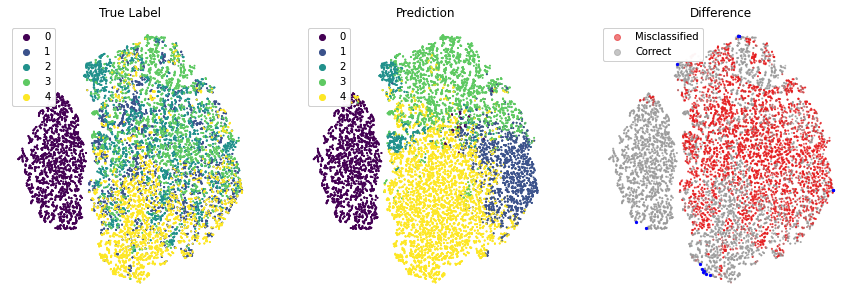

In [16]:
PLOT_EPOCH = 50

train_loader_noshuffle = DataLoader(train_dataset, shuffle=False, batch_size=BATCH)
plot_latent(model, PLOT_EPOCH, train_loader_noshuffle, method='tsne', split='train')

### Confusion Matrix
- !!! **PLOT_EPOCH** 변경을 통해 분석할 모델 epoch 결정

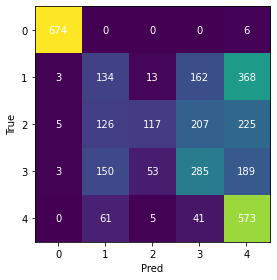

In [17]:
PLOT_EPOCH = 50

make_confmat(model, PLOT_EPOCH, test_loader)

# 2-2. 결과 분석 (Deep Kernel Models)
- Deep Classification 모델의 경우, ***2-1***에서 분석

!!! **TEST_EPOCH** 변경을 통해 분석할 모델 epoch 결정

In [20]:
TEST_EPOCH = 50
model.load_state_dict(torch.load('./saved_models/%s_e%d.pth'%(model.model_name, TEST_EPOCH)))

<All keys matched successfully>

In [11]:
from src.utils.kernel_eval_utils import *

#### 학습 데이터(정상 데이터)에 대해 loss 계산 및 ground-truth label 추출

In [21]:
train_loader_noshuffle =  DataLoader(train_dataset, batch_size=BATCH, shuffle=False)
losses_train, ys_train = run_inference(model, train_loader_noshuffle)

print(losses_train.shape)

torch.Size([14680])


### 학습 데이터 중 Labeled 데이터(mask>=0)에 대해 생성된 loss값 분포를 바탕으로, 이상 수치 threshold 결정

tensor(3) tensor(19) tensor(14658)


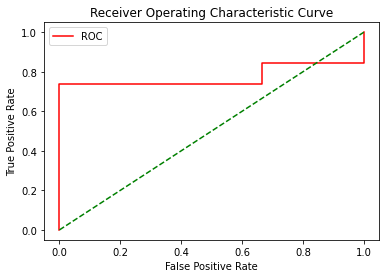

Thres : 1.0946e+00,	FPR : 0.0000,	TPR : 0.0000
Thres : 9.4640e-02,	FPR : 0.0000,	TPR : 0.0526
Thres : 5.5290e-02,	FPR : 0.0000,	TPR : 0.7368
Thres : 4.9148e-02,	FPR : 0.6667,	TPR : 0.7368
Thres : 4.7002e-02,	FPR : 0.6667,	TPR : 0.8421
Thres : 4.6732e-02,	FPR : 1.0000,	TPR : 0.8421
Thres : 3.3340e-03,	FPR : 1.0000,	TPR : 1.0000
Best Thres : 5.5290e-02


In [22]:
from sklearn.metrics import roc_curve

print((ys_train==0).sum(), (ys_train>0).sum(), (ys_train<0).sum())
fpr, tpr, thresholds = roc_curve([0]*losses_train[ys_train==0].shape[0]+[1]*losses_train[ys_train>0].shape[0], losses_train[ys_train>=0].flatten())

plot_roc_curve(fpr,tpr)
thres = 0.0
best_score = 0.0
for i in range(len(fpr)):
    score = tpr[i]+1-fpr[i]
    if score > best_score:
        best_score = score
        thres = thresholds[i]
    print("Thres : %.4e,\tFPR : %.4f,\tTPR : %.4f"%(thresholds[i],fpr[i],tpr[i]))
#print(fpr,tpr,thres)
print('Best Thres : %.4e'%thres)

#### Test 데이터에 대해 loss 계산

In [23]:
losses, ys = run_inference(model, test_loader)

losses_p = losses[ys==0]
losses_n = losses[ys!=0]
print(losses_p.shape, losses_n.shape)

torch.Size([680]) torch.Size([2720])


#### 결정된 threshold를 바탕으로, Test 데이터에 대한 Confusion matrix (TP/FP/FN/TN) 및 Accuracy, Precision, Recall 계산

In [24]:
TP = len(losses_p[losses_p<thres])
FN = len(losses_p[losses_p>thres])
TN = len(losses_n[losses_n>thres])
FP = len(losses_n[losses_n<thres])
print('TP : %5d,\tFP : %5d'%(TP, FP))
print('FN : %5d,\tTN : %5d'%(FN ,TN))
print('Accuracy : %.2f,\tPrecision : %.2f,\tRecall : %.2f'%((TP+TN)/(TP+TN+FP+FN), (TP)/(TP+FP+1e-10), (TP)/(TP+FN)))

TP :   680,	FP :  2486
FN :     0,	TN :   234
Accuracy : 0.27,	Precision : 0.21,	Recall : 1.00


#### Test 데이터의 각 ground-truth label 별 loss 분포 확인

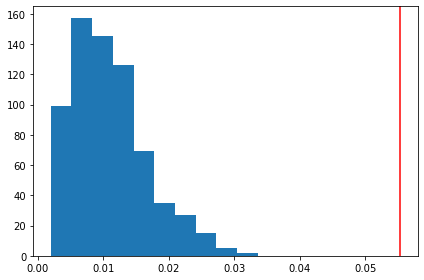

[Normal]
Max : 0.0335	Mean : 0.0111	Min : 0.0020



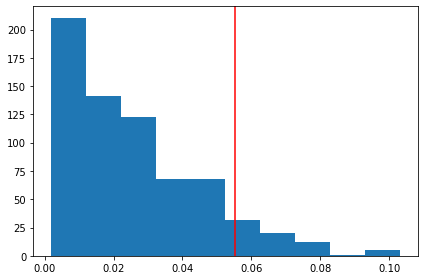

[Anomaly 1]
Max : 0.1032	Mean : 0.0257	Min : 0.0018



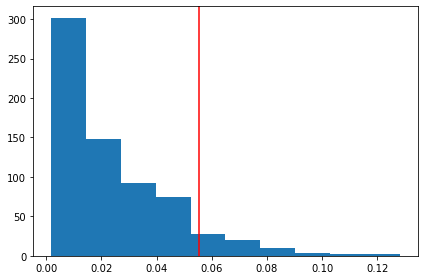

[Anomaly 2]
Max : 0.1283	Mean : 0.0238	Min : 0.0016



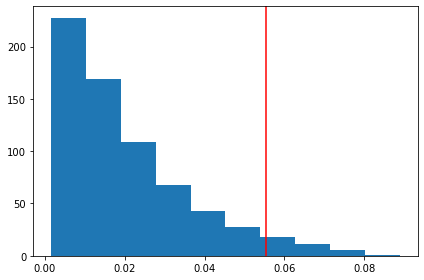

[Anomaly 3]
Max : 0.0890	Mean : 0.0205	Min : 0.0015



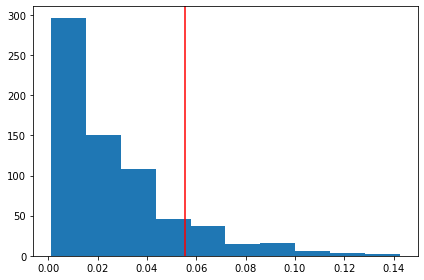

[Anomaly 4]
Max : 0.1426	Mean : 0.0268	Min : 0.0011



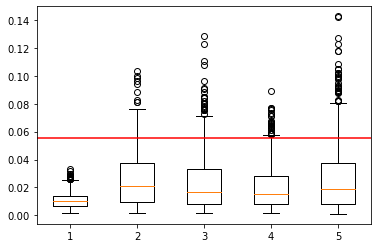

In [25]:
import matplotlib.pyplot as plt
maxes=[]
means=[]
mins=[]
lois = [losses[ys==i] for i in range(5)]
for i in range(5):
    loi = lois[i]
    counts, bins = np.histogram(loi)
    plt.hist(bins[:-1], bins, weights=counts)
    plt.axvline(thres, c='r')
    plt.tight_layout()
    plt.show()
    if i==0:
        print('[Normal]')
    else:
        print('[Anomaly %d]'%i)
    maxes.append(loi.max())
    means.append(loi.mean())
    mins.append(loi.min())
    print('Max : %.4f\tMean : %.4f\tMin : %.4f\n'%(maxes[-1], means[-1], mins[-1]))
    
plt.boxplot(lois)
plt.axhline(thres, c='r')
plt.show()

#### Test 데이터의 각 비정상 상태 label(우)에 대해, 정상 데이터(좌)와의 loss 분포 비교

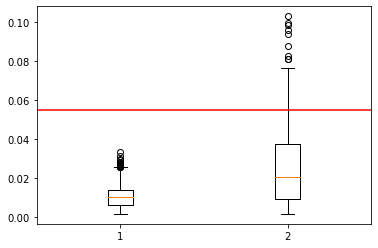

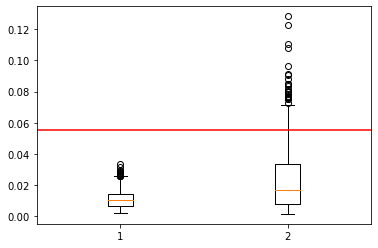

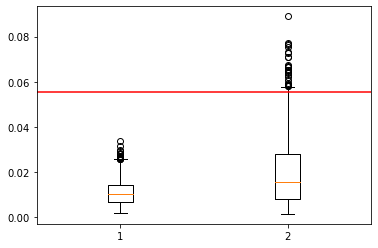

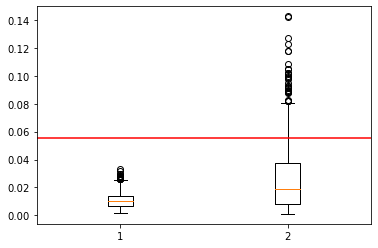

In [26]:
for i in range(4):
    plt.boxplot([lois[0],lois[i+1]])
    plt.axhline(thres, c='r')
    plt.show()

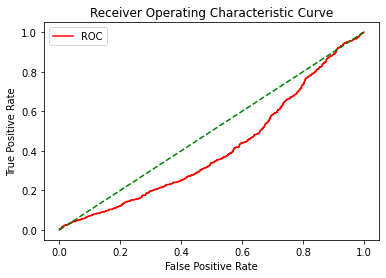

Thres : 1.1426e+00,	FPR : 0.0000,	TPR : 0.0000
Thres : 1.4260e-01,	FPR : 0.0000,	TPR : 0.0004
Thres : 1.0472e-01,	FPR : 0.0000,	TPR : 0.0048
Thres : 1.0318e-01,	FPR : 0.0015,	TPR : 0.0048
Thres : 9.9845e-02,	FPR : 0.0015,	TPR : 0.0063
Thres : 9.9556e-02,	FPR : 0.0029,	TPR : 0.0063
Thres : 9.9285e-02,	FPR : 0.0029,	TPR : 0.0066
Thres : 9.8637e-02,	FPR : 0.0044,	TPR : 0.0066
Thres : 9.7943e-02,	FPR : 0.0044,	TPR : 0.0074
Thres : 9.6192e-02,	FPR : 0.0059,	TPR : 0.0074
Thres : 9.4831e-02,	FPR : 0.0059,	TPR : 0.0081
Thres : 9.4130e-02,	FPR : 0.0074,	TPR : 0.0081
Thres : 8.8102e-02,	FPR : 0.0074,	TPR : 0.0132
Thres : 8.8080e-02,	FPR : 0.0088,	TPR : 0.0132
Thres : 8.2868e-02,	FPR : 0.0088,	TPR : 0.0154
Thres : 8.2771e-02,	FPR : 0.0103,	TPR : 0.0154
Thres : 8.1730e-02,	FPR : 0.0103,	TPR : 0.0169
Thres : 8.1398e-02,	FPR : 0.0132,	TPR : 0.0169
Thres : 7.6614e-02,	FPR : 0.0132,	TPR : 0.0210
Thres : 7.6449e-02,	FPR : 0.0162,	TPR : 0.0210
Thres : 7.5379e-02,	FPR : 0.0162,	TPR : 0.0239
Thres : 7.536

In [27]:
fpr, tpr, thresholds = roc_curve([0]*losses[ys==0].shape[0]+[1]*losses[ys!=0].shape[0], losses.flatten())

plot_roc_curve(fpr,tpr)
for i in range(len(fpr)):
    print("Thres : %.4e,\tFPR : %.4f,\tTPR : %.4f"%(thresholds[i],fpr[i],tpr[i]))
#print(fpr,tpr,thres)

#### ROC 커브 확인

In [28]:
THRESHOLD = 7.4378e-03
TP = len(losses_p[losses_p<THRESHOLD])
FN = len(losses_p[losses_p>THRESHOLD])
TN = len(losses_n[losses_n>THRESHOLD])
FP = len(losses_n[losses_n<THRESHOLD])
print('TP : %5d,\tFP : %5d'%(TP, FP))
print('FN : %5d,\tTN : %5d'%(FN ,TN))
print('Accuracy : %.2f,\tPrecision : %.2f,\tRecall : %.2f'%((TP+TN)/(TP+TN+FP+FN), (TP)/(TP+FP+1e-10), (TP)/(TP+FN)))

TP :   212,	FP :   601
FN :   468,	TN :  2119
Accuracy : 0.69,	Precision : 0.26,	Recall : 0.31
